## February and April 2020 precipitation anomalies

In this notebook, we will analyze precipitation anomalies of February and April 2020, which seemed to be very contrasting in weather. We use the EOBS dataset. 

### Import packages

In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [2]:
##import packages
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mtickerpip


In [3]:
os.chdir(os.path.abspath('../../')) # Change the working directory to UNSEEN-open
os.getcwd() #print the working directory

'/Users/andreakuijt/Documents/Github/UNSEEN-open'

In [4]:
### Set plot font size
plt.rcParams['font.size'] = 10  ## change font size

### Load EOBS

I downloaded EOBS (from 1950 - 2019) and the most recent EOBS data (2020) [here](https://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php). Note, you have to register as E-OBS user.

The data has a daily timestep. I resample the data into monthly average mm/day. I chose not to use the total monthly precipitation because of leap days. 

In [5]:
EOBS = xr.open_dataset('./doc/Notebooks/UK_example/EOBS/rr_ens_mean_0.25deg_reg_v20.0e.nc') ## open the data
EOBS = EOBS.resample(time='1m').mean() ## Monthly averages
# EOBS = EOBS.sel(time=EOBS['time.month'] == 2) ## Select only February
EOBS

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 835)
Coordinates:
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 1950-01-31 1950-02-28 ... 2019-07-31
Data variables:
    rr         (time, latitude, longitude) float32 nan nan nan ... nan nan nan
Attributes:
    E-OBS_version:  20.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Tue Sep 24 12:18:37 2019: ncks -O -d time,0,25413 /data4/...
    NCO:            netCDF Operators version 4.7.5 (Homepage = http://nco.sf....

Here I define the attributes, that xarray uses when plotting

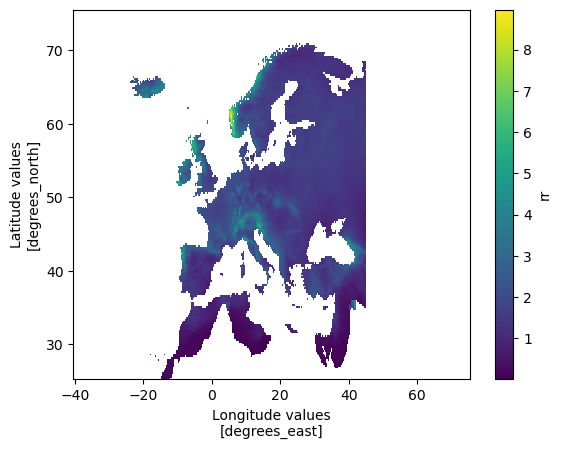

In [6]:
EOBS['rr'].attrs = {'long_name': 'rainfall',  ##Define the name
 'units': 'mm/day', ## unit
 'standard_name': 'thickness_of_rainfall_amount'} ## original name, not used
EOBS['rr'].mean('time').plot() ## and show the 1950-2019 average February precipitation 


The 2020 data file is separate and needs the same preprocessing:

In [11]:
EOBS2020 = xr.open_dataset('./doc/Notebooks/UK_example/EOBS/rr_0.25deg_day_2020_grid_ensmean.nc') #open
EOBS2020 = EOBS2020.resample(time='1m').mean() #Monthly mean
EOBS2020['rr'].sel(time='2020-04').plot() #show map
EOBS2020 ## display dataset

KeyError: "not all values found in index 'time'. Try setting the `method` keyword argument (example: method='nearest')."

### Plot the 2020 event

I calculate the anomaly (deviation from the mean in mm/d) and divide this by the standard deviation to obtain the standardized anomalies. 

In [13]:
EOBS2020_anomaly = EOBS2020['rr'].groupby('time.month') - EOBS['rr'].groupby('time.month').mean('time')
EOBS2020_anomaly

EOBS2020_sd_anomaly = EOBS2020_anomaly.groupby('time.month') / EOBS['rr'].groupby('time.month').std('time')

EOBS2020_sd_anomaly.attrs = {
    'long_name': 'Monthly precipitation standardized anomaly',
    'units': '-'
}

EOBS2020_sd_anomaly

<xarray.DataArray 'rr' (time: 12, latitude: 201, longitude: 464)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 2023-01-31 2023-02-28 ... 2023-12-31
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 12

<xarray.DataArray 'rr' (time: 12, latitude: 201, longitude: 464)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 2023-01-31 2023-02-28 ... 2023-12-31
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Monthly precipitation standardized anomaly
    units:      -

I select February and April (tips on how to select this are appreciated)

In [14]:
EOBS2020_sd_anomaly.isel(time=[1,3])

<xarray.DataArray 'rr' (time: 2, latitude: 201, longitude: 464)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 2023-02-28 2023-04-30
    month      (time) int64 2 4
Attributes:
    long_name:  Monthly precipitation standardized anomaly
    units:      -

And plot using cartopy!

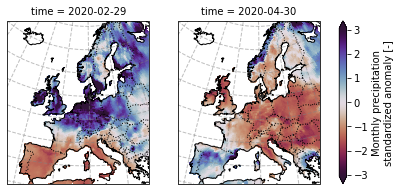

In [11]:
EOBS_plots = EOBS2020_sd_anomaly[[1, 3], :, :].plot(
    transform=ccrs.PlateCarree(),
    robust=True,
    extend = 'both',
    col='time',
    cmap=plt.cm.twilight_shifted_r,
    subplot_kws={'projection': ccrs.EuroPP()})

for ax in EOBS_plots.axes.flat:
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.coastlines(resolution='50m')
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                      draw_labels=False,
                      linewidth=1,
                      color='gray',
                      alpha=0.5,
                      linestyle='--')

# plt.savefig('graphs/February_April_2020_precipAnomaly.png', dpi=300)